<a href="https://colab.research.google.com/github/DiegoMB2004/airline-client-satisfaction/blob/main/airline_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Parte A: Método de Regresión Logística***

***Paso 1: Carga y exploración de los datos***

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Proyecto Final Aerolínea.csv')
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()
df.describe()
df.head()


Shape: (129487, 25)
Columns: Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'class_Business', 'class_Eco', 'class_Eco_Plus', 'satisfaction'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             129487 non-null  int64
 1   customer_type                      129487 non-null  int64
 2   age                              

,Gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class_Business,class_Eco,class_Eco_Plus,satisfaction
0,1,0,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18,0,0,1,0
1,1,1,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6,1,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0,1,0,0,1
3,0,0,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9,1,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0,1,0,0,1


***Paso 2: Separación de variables predictoras y objetivo***

In [ ]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (129487, 24)
Target shape: (129487,)


***Paso 3: División en conjunto de entrenamiento y prueba***

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Paso 4: Codificación One-Hot de variables categóricas***

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Gender', 'customer_type', 'type_of_travel', 'class_Business', 'class_Eco', 'class_Eco_Plus']
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])


***Paso 5: Escalado de variables numéricas***

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = X_train.drop(columns=categorical_features).columns
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])


***Paso 6: Unión de variables codificadas y escaladas***

In [ ]:
import numpy as np

X_train_final = np.hstack((X_train_scaled, X_train_encoded))
X_test_final = np.hstack((X_test_scaled, X_test_encoded))


***Paso 7: Entrenamiento del modelo con búsqueda de hiperparámetros***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_model = None
best_score = 0

for C in [0.01, 0.1, 1, 10]:
    for max_iter in [100, 200, 500]:
        for penalty in ['l1', 'l2']:
            model = LogisticRegression(C=C, max_iter=max_iter, penalty=penalty, solver='liblinear')
            model.fit(X_train_final, y_train)
            y_pred = model.predict(X_test_final)
            score = accuracy_score(y_test, y_pred)
            if score > best_score:
                best_score = score
                best_model = model



***Paso 8: Evaluación del mejor modelo***

Best Model Hyperparameters: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy: 0.8757046876206657
Recall: 0.8374888691006234
F1 Score: 0.8538744382405011

Confusion Matrix:
 [[13274  1394]
 [ 1825  9405]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14668
           1       0.87      0.84      0.85     11230

    accuracy                           0.88     25898
   macro avg       0.88      0.87      0.87     25898
weighted avg       0.88      0.88      0.88     25898



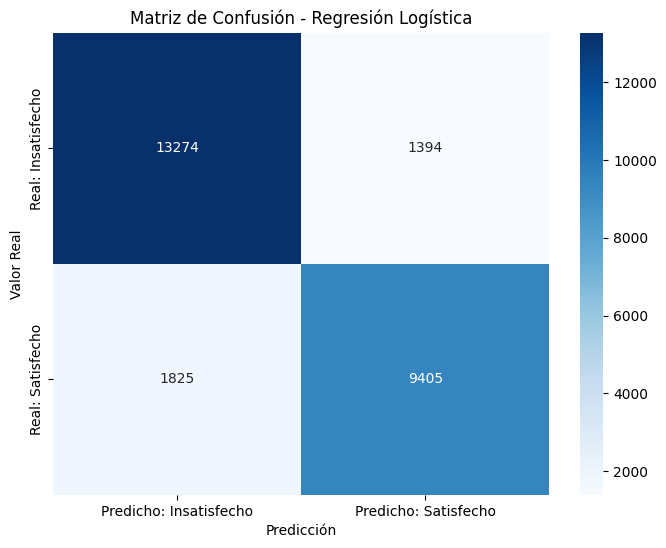

In [ ]:
# Importar librerías necesarias
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones con el mejor modelo
y_pred = best_model.predict(X_test_final)

# Evaluación del modelo
print("Best Model Hyperparameters:", best_model.get_params())
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho: Insatisfecho', 'Predicho: Satisfecho'],
            yticklabels=['Real: Insatisfecho', 'Real: Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()




In [ ]:
import pandas as pd

df = pd.read_csv('/content/Proyecto Final Aerolínea.csv')


In [ ]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Gender', 'customer_type', 'type_of_travel', 'class_Business', 'class_Eco', 'class_Eco_Plus']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = X_train.drop(columns=categorical_features).columns
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])


In [ ]:
import numpy as np

X_train_final = np.hstack((X_train_scaled, X_train_encoded))
X_test_final = np.hstack((X_test_scaled, X_test_encoded))


In [ ]:
from sklearn.linear_model import LogisticRegression

best_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
best_model.fit(X_train_final, y_train)


LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

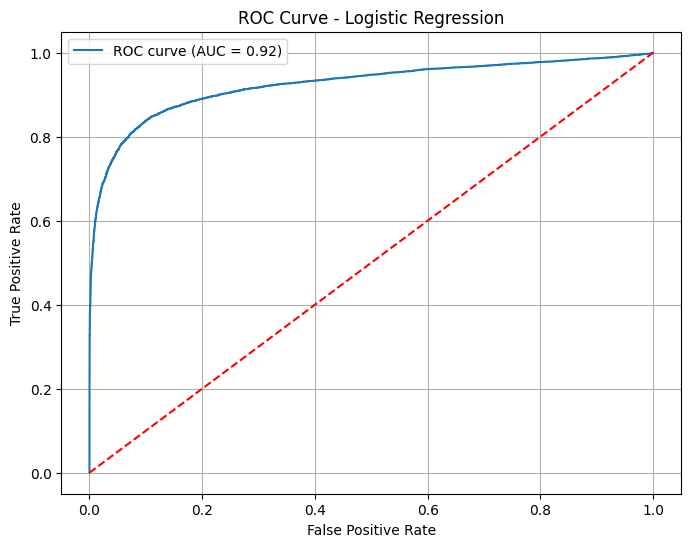

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


***Paso 9: Visualización de la importancia de las características***

<ipython-input-10-2ee29279f38b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False), palette='viridis')


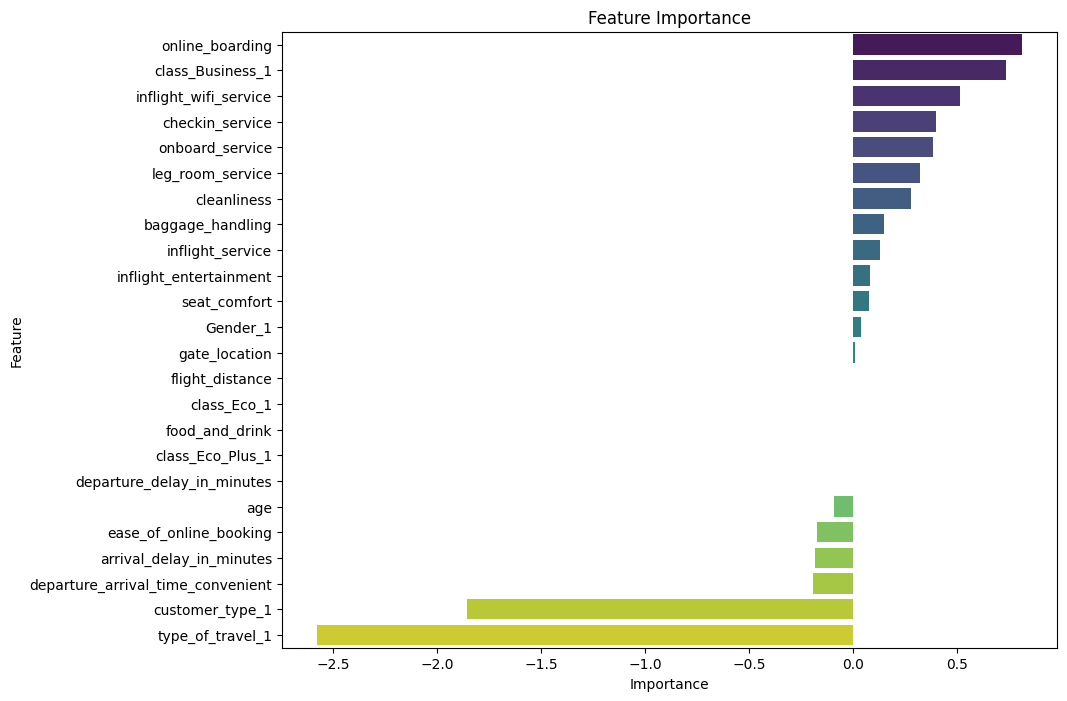

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importance_df = pd.DataFrame({
    'Feature': np.hstack((numerical_features, encoder.get_feature_names_out(categorical_features))),
    'Importance': best_model.coef_[0]
})

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False), palette='viridis')
plt.title('Feature Importance')
plt.show()


***Paso 10: Demostración de la función de logística (sigmoide estándar)***

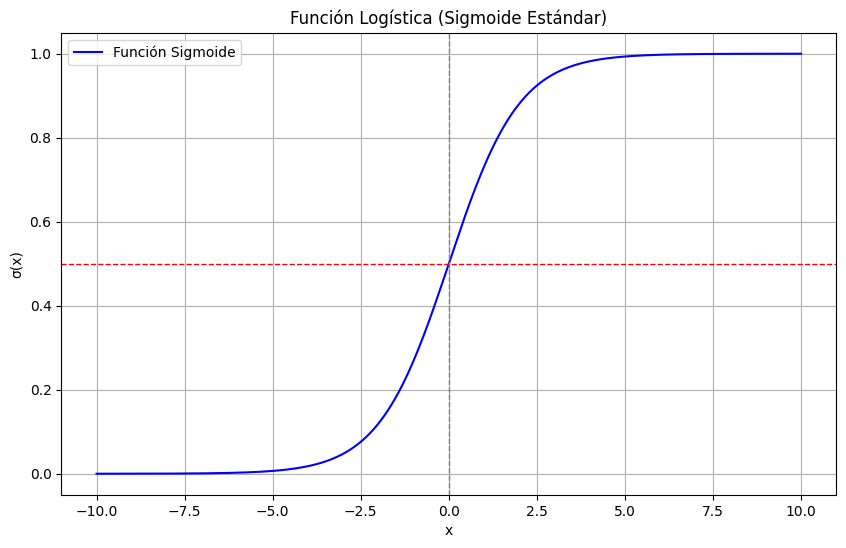

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Crear valores de x desde -10 hasta 10
x_values = np.linspace(-10, 10, 400)

# Calcular los valores de la función sigmoide
sigmoid_values = sigmoid(x_values)

# Graficar la función sigmoide
plt.figure(figsize=(10, 6))
plt.plot(x_values, sigmoid_values, label='Función Sigmoide', color='blue')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(0.5, color='red', linestyle='--', linewidth=1)
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('Función Logística (Sigmoide Estándar)')
plt.legend()
plt.grid(True)
plt.show()


***Paso 11: Función de predicción personalizada***

In [ ]:
def predict_satisfaction(features):
    # Split the input into categorical and numerical parts
    categorical_input = features[:6]  # First 6 values: Gender, customer_type, type_of_travel, class_Business, class_Eco, class_Eco_Plus
    numerical_input = features[6:]    # Remaining values: numerical features

    # One-hot encode categorical input
    encoded = encoder.transform([categorical_input])

    # Scale numerical input
    scaled = scaler.transform([numerical_input])

    # Combine both
    final_input = np.hstack((scaled, encoded))

    # Predict
    prediction = best_model.predict(final_input)
    return 'Satisfied' if prediction[0] == 1 else 'Not satisfied'



In [ ]:
# Example input: [Gender, customer_type, type_of_travel, class_Business, class_Eco, class_Eco_Plus, ...numerical features]
example = [1, 0, 0, 1, 0, 0, 30, 1500, 3, 4, 3, 2, 5, 4, 5, 5, 4, 3, 4, 4, 5, 5, 10, 5]

print("Prediction:", predict_satisfaction(example))


Prediction: Satisfied


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***Parte B: Método de KNN***

***Paso 1: Carga y exploración de los datos***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Cargar los datos
df = pd.read_csv('/content/Proyecto Final Aerolínea.csv')
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()
df.describe()
df.head()

df_aerolinea = pd.read_csv('/content/Proyecto Final Aerolínea.csv')
display(df_aerolinea.head())

Shape: (129487, 25)
Columns: Index(['Gender', 'customer_type', 'age', 'type_of_travel', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'onboard_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'class_Business', 'class_Eco', 'class_Eco_Plus', 'satisfaction'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             129487 non-null  int64
 1   customer_type                      129487 non-null  int64
 2   age                              

,Gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class_Business,class_Eco,class_Eco_Plus,satisfaction
0,1,0,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18,0,0,1,0
1,1,1,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6,1,0,0,0
2,0,0,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0,1,0,0,1
3,0,0,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9,1,0,0,0
4,1,0,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0,1,0,0,1


***Paso 2: Separación de variables predictoras y objetivo***

In [ ]:
df_aerolinea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Gender                             129487 non-null  int64
 1   customer_type                      129487 non-null  int64
 2   age                                129487 non-null  int64
 3   type_of_travel                     129487 non-null  int64
 4   flight_distance                    129487 non-null  int64
 5   inflight_wifi_service              129487 non-null  int64
 6   departure_arrival_time_convenient  129487 non-null  int64
 7   ease_of_online_booking             129487 non-null  int64
 8   gate_location                      129487 non-null  int64
 9   food_and_drink                     129487 non-null  int64
 10  online_boarding                    129487 non-null  int64
 11  seat_comfort                       129487 non-null  int64
 12  in

In [ ]:
X = df_aerolinea.drop(columns=['satisfaction'])
y = df_aerolinea['satisfaction']
X, y

(        Gender  customer_type  age  type_of_travel  flight_distance  \
 0            1              0   13               1              460   
 1            1              1   25               0              235   
 2            0              0   26               0             1142   
 3            0              0   25               0              562   
 4            1              0   61               0              214   
 ...        ...            ...  ...             ...              ...   
 129482       1              1   34               0              526   
 129483       1              0   23               0              646   
 129484       0              0   17               1              828   
 129485       1              0   14               0             1127   
 129486       0              0   42               1              264   
 
         inflight_wifi_service  departure_arrival_time_convenient  \
 0                           3                                  4

***Paso 3. Dividir el dataset en entrenamiento y prueba***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print("Training set", X_train.shape[0])
print("Test set", X_test.shape[0])

Training set 103589
Test set 25898


***Paso 4: Escalar los datos (importante para KNN)***

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,Gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class_Business,class_Eco,class_Eco_Plus
0,1.015969,2.106121,-1.087401,-0.668865,-0.368053,-0.548451,-0.037124,0.171807,1.580460,-0.908341,...,1.253671,-1.382125,1.335164,1.152772,1.303012,-0.386093,-0.393387,-0.956843,1.107032,-0.280021
1,1.015969,-0.474807,-0.159977,-0.668865,1.067202,0.203906,-0.037124,0.171807,0.016591,-0.156574,...,0.494271,0.311698,1.335164,0.304097,-0.220000,-0.386093,-0.080064,1.045104,-0.903317,-0.280021
2,-0.984282,-0.474807,0.105001,-0.668865,-0.995915,0.956263,0.617905,0.884924,0.798526,1.346960,...,0.494271,1.158610,1.335164,0.304097,1.303012,-0.386093,-0.393387,-0.956843,1.107032,-0.280021
3,1.015969,2.106121,-1.286134,-0.668865,-0.199554,-0.548451,-0.692154,-0.541311,0.016591,-1.660109,...,-0.265129,1.158610,0.545886,1.152772,-1.743013,-0.386093,-0.393387,-0.956843,1.107032,-0.280021
4,-0.984282,-0.474807,0.105001,-0.668865,-0.294836,0.203906,1.272935,0.171807,0.016591,-0.156574,...,0.494271,0.311698,1.335164,0.304097,0.541506,0.036660,0.102707,1.045104,-0.903317,-0.280021


***Paso 5: Determinación del k óptimo para KNN***

In [ ]:
error_rate = []
for k in range(1,31):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train_scaled, y_train)
  knn_y_pred = knn_model.predict(X_test_scaled)
  error_rate.append(np.mean(knn_y_pred != y_test))
  print(error_rate)


[np.float64(0.08309521970808556)]
[np.float64(0.08309521970808556), np.float64(0.08823075140937524)]
[np.float64(0.08309521970808556), np.float64(0.08823075140937524), np.float64(0.07510232450382269)]
[np.float64(0.08309521970808556), np.float64(0.08823075140937524), np.float64(0.07510232450382269), np.float64(0.07884778747393621)]
[np.float64(0.08309521970808556), np.float64(0.08823075140937524), np.float64(0.07510232450382269), np.float64(0.07884778747393621), np.float64(0.07243802610240173)]
[np.float64(0.08309521970808556), np.float64(0.08823075140937524), np.float64(0.07510232450382269), np.float64(0.07884778747393621), np.float64(0.07243802610240173), np.float64(0.07595181095065257)]
[np.float64(0.08309521970808556), np.float64(0.08823075140937524), np.float64(0.07510232450382269), np.float64(0.07884778747393621), np.float64(0.07243802610240173), np.float64(0.07595181095065257), np.float64(0.0717043787165032)]
[np.float64(0.08309521970808556), np.float64(0.08823075140937524), np.

In [ ]:
ks = np.arange(1, 31)
ks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

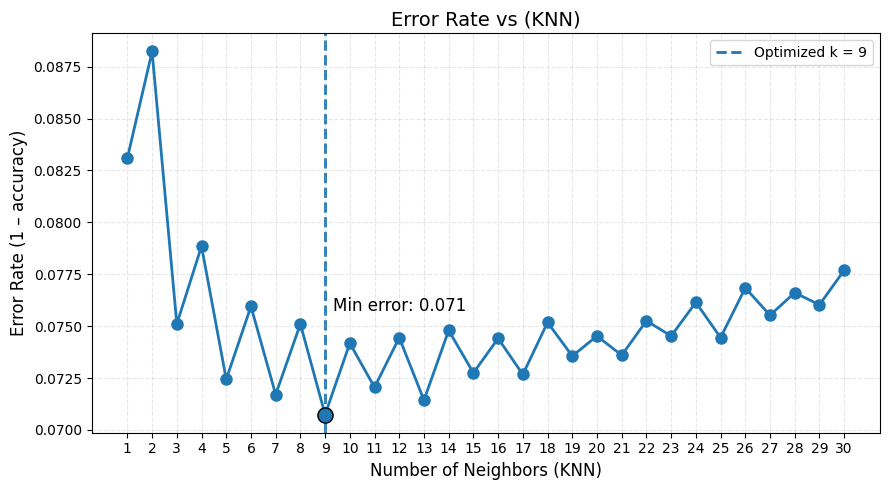

In [ ]:
# Calculation of the optimal k
k_opt = ks[np.argmin(error_rate)]
min_err = error_rate[np.argmin(error_rate)]
#Plot
plt.figure(figsize=(9, 5))
plt.plot(ks, error_rate, linewidth=2, marker='o', markersize=8)
plt.axvline(k_opt, linestyle='--', linewidth=2,
            label=f'Optimized k = {k_opt}', zorder=0)
plt.scatter([k_opt], [min_err], s=120, edgecolor='black',
            zorder=3)

# Annotation of the minimum error
plt.text(k_opt + 0.3, min_err + 0.005,
         f'Min error: {min_err:.3f}',
         fontsize=12, color='black')

plt.title('Error Rate vs (KNN)', fontsize=14)
plt.xlabel('Number of Neighbors (KNN)', fontsize=12)
plt.ylabel('Error Rate (1 – accuracy)', fontsize=12)
plt.xticks(ks)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.legend()
plt.show()

***Paso 6: Entrenamiento del modelo con el k óptimo***

In [ ]:
best_knn_model = KNeighborsClassifier(n_neighbors=k_opt)
best_knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=np.int64(9))

***Paso 7: Evaluación del modelo***

In [ ]:
knn_y_pred = best_knn_model.predict(X_test_scaled)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, knn_y_pred )
conf_matrix = confusion_matrix(y_test,knn_y_pred )
class_report = classification_report(y_test, knn_y_pred )
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9293

Confusion Matrix:
[[14170   475]
 [ 1357  9896]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14645
           1       0.95      0.88      0.92     11253

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.93     25898
weighted avg       0.93      0.93      0.93     25898

ROC AUC Score: 0.9803


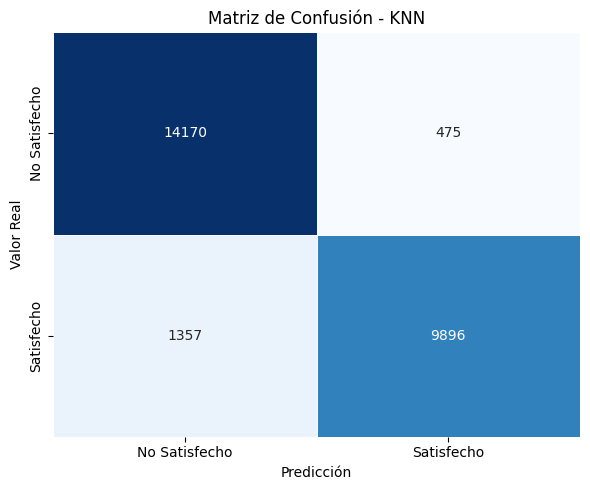

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, knn_y_pred)

# Etiquetas de clase
labels = ['No Satisfecho', 'Satisfecho']

# Visualizar con heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, linewidths=.5, cbar=False)

plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()


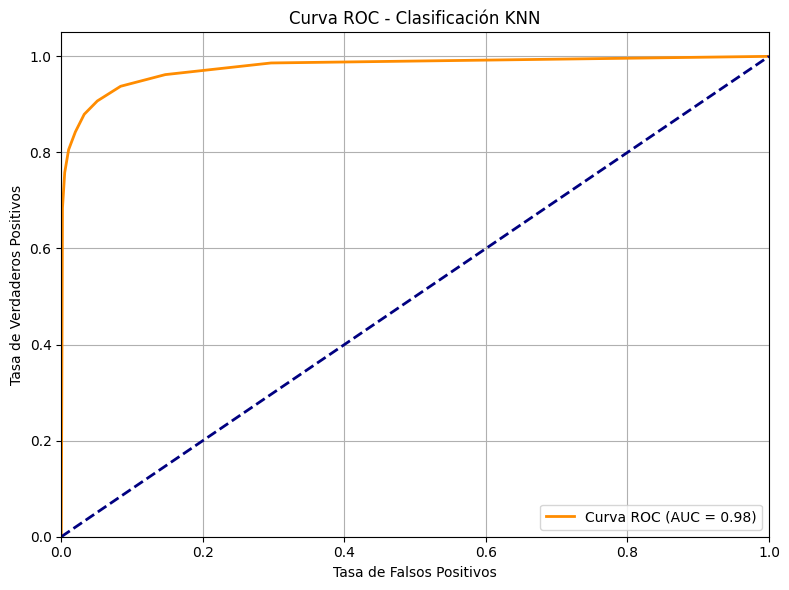

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades de predicción de la clase positiva
y_proba = best_knn_model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Clasificación KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


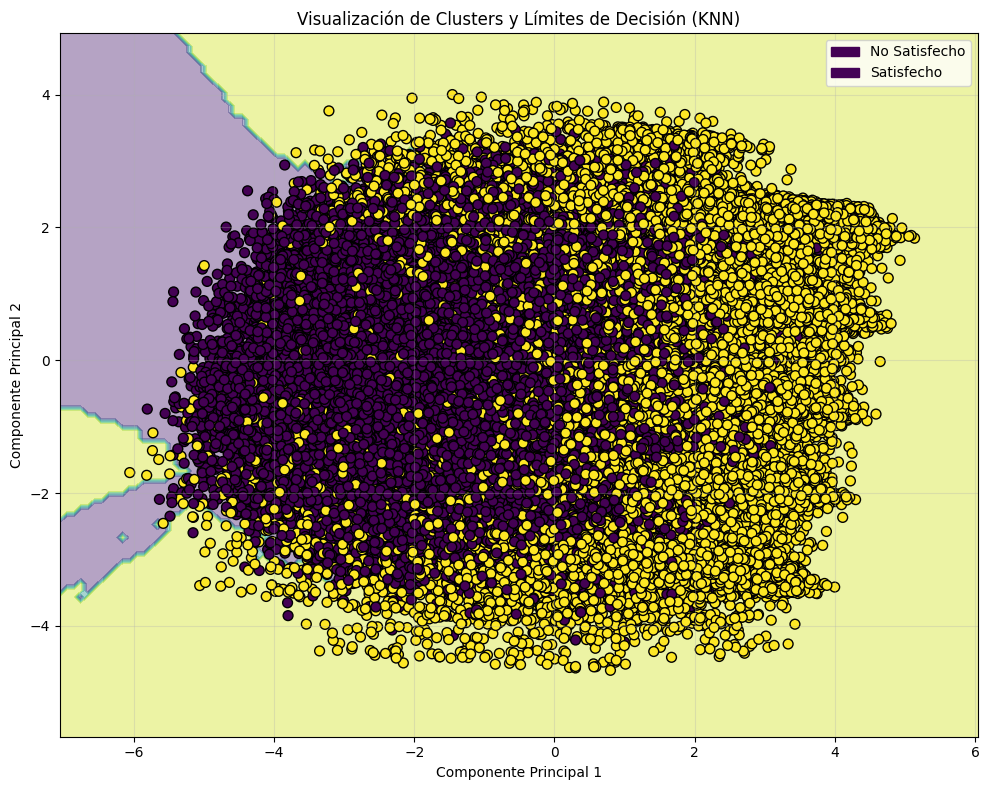

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

# Reducción de dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar el modelo KNN con los datos reducidos
best_knn_model_pca = KNeighborsClassifier(n_neighbors=k_opt)
best_knn_model_pca.fit(X_train_pca, y_train)

# Crear una malla para visualizar los límites de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir las clases para cada punto en la malla
Z = best_knn_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los límites de decisión y los puntos de entrenamiento
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train,
                      cmap='viridis', edgecolor='k', s=50)
plt.title('Visualización de Clusters y Límites de Decisión (KNN)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Leyenda
classes = ['No Satisfecho', 'Satisfecho']
handles = [mpatches.Patch(color=plt.cm.viridis(i), label=classes[i])
           for i in range(len(classes))]
plt.legend(handles=handles)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

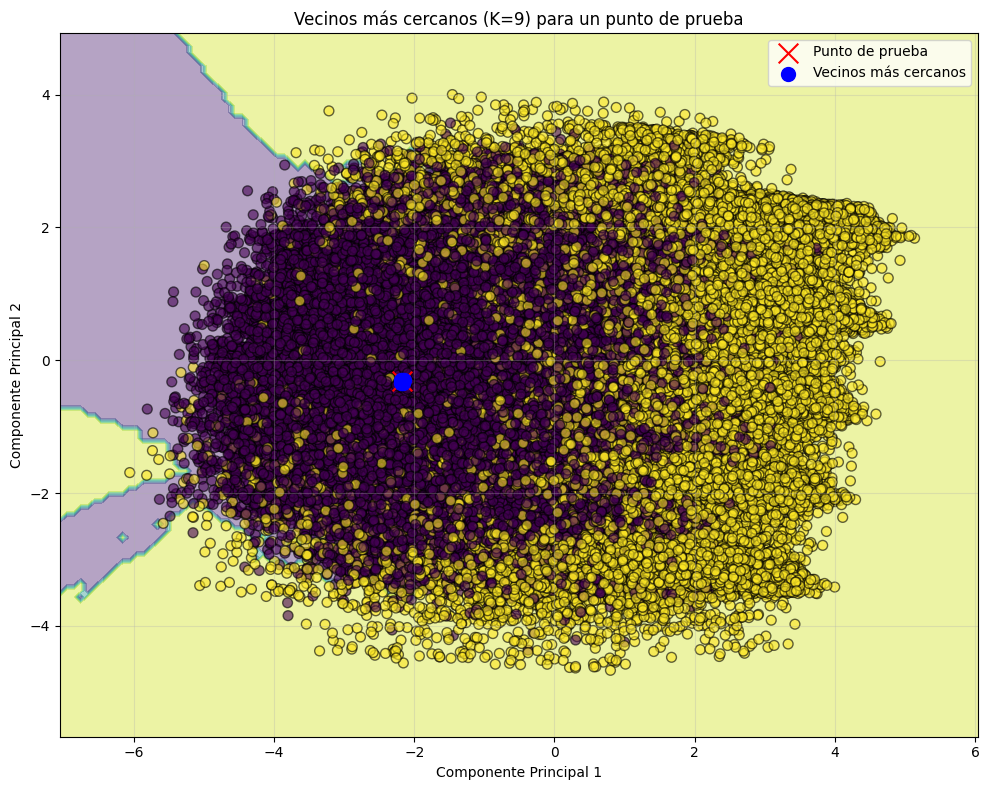

In [ ]:
# Ejemplo: Visualizar vecinos más cercanos para un punto de prueba
point_index = 0  # Cambia este índice para ver otros puntos
distances, indices = best_knn_model_pca.kneighbors([X_test_pca[point_index]])

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train,
            cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.scatter(X_test_pca[point_index, 0], X_test_pca[point_index, 1],
            c='red', marker='x', s=200, label='Punto de prueba')
plt.scatter(X_train_pca[indices[0], 0], X_train_pca[indices[0], 1],
            c='blue', marker='o', s=100, label='Vecinos más cercanos')
plt.title(f'Vecinos más cercanos (K={k_opt}) para un punto de prueba')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

***Parte C: Método de Naive Bayes Gaussiano***

***Paso 1: Carga y exploración inicial de los datos***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('/content/Proyecto Final Aerolínea.csv')
df.head()

# Exploración inicial de los datos
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())
print("\nDistribución de la variable objetivo 'satisfaction':")
print(df['satisfaction'].value_counts())

   Gender  customer_type  age  type_of_travel  flight_distance  \
0       1              0   13               1              460   
1       1              1   25               0              235   
2       0              0   26               0             1142   
3       0              0   25               0              562   
4       1              0   61               0              214   

   inflight_wifi_service  departure_arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   ease_of_online_booking  gate_location  food_and_drink  ...  \
0                       3              1               5  ...   
1                       3              3               1  ...   
2                       2    

***Paso 2: Preparación de los datos***

In [ ]:
# Separar características (x) y variable objetivo (y)
x = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar las características (Naive Bayes no requiere escalado, pero puede ayudar en algunos casos)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

***Paso 3: Creación y entrenamiento del modelo***

In [ ]:
# Crear y entrenar el modelo Naive Bayes Gaussiano
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = nb_model.predict(x_test_scaled)

***Paso 4: Evaluación del modelo***


Precision del modelo: 0.8487

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14645
           1       0.84      0.81      0.82     11253

    accuracy                           0.85     25898
   macro avg       0.85      0.84      0.85     25898
weighted avg       0.85      0.85      0.85     25898



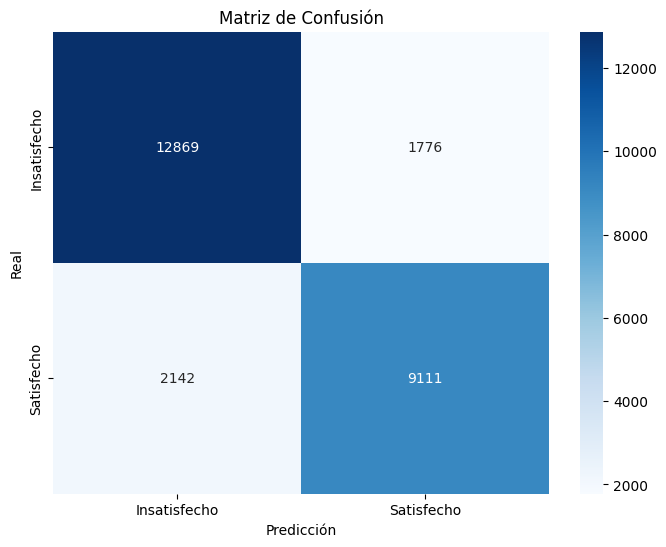

In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecision del modelo: {accuracy:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Insatisfecho', 'Satisfecho'],
            yticklabels=['Insatisfecho', 'Satisfecho'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

***Paso 5: Función para predecir con nuevos datos***

In [ ]:
# Función para predecir satisfacción con nuevos datos
def predict_satisfaction(model, scaler, new_data):
    """
    Predice la satisfacción del cliente con nuevos datos.

    Parámetros:
    model -- modelo entrenado
    scaler -- scaler ajustado
    new_data -- diccionario con los valores de las características

    Retorna:
    Predicción (0 = Insatisfecho, 1 = Satisfecho)
    """
    new_df = pd.DataFrame([new_data])
    new_scaled = scaler.transform(new_df)
    prediction = model.predict(new_scaled)
    return prediction[0]

**Paso 6: Ejemplo de predicción para nuevo cliente**

In [ ]:
# Diccionario con los datos del nuevo cliente
nuevo_cliente = {
    'Gender': 1,
    'customer_type': 0,
    'age': 35,
    'type_of_travel': 1,
    'flight_distance': 1200,
    'inflight_wifi_service': 4,
    'departure_arrival_time_convenient': 3,
    'ease_of_online_booking': 4,
    'gate_location': 3,
    'food_and_drink': 4,
    'online_boarding': 5,
    'seat_comfort': 5,
    'inflight_entertainment': 5,
    'onboard_service': 4,
    'leg_room_service': 4,
    'baggage_handling': 4,
    'checkin_service': 4,
    'inflight_service': 5,
    'cleanliness': 5,
    'departure_delay_in_minutes': 10,
    'arrival_delay_in_minutes': 5,
    'class_Business': 1,
    'class_Eco': 0,
    'class_Eco_Plus': 0
}

# Realizar la predicción
prediccion = predict_satisfaction(nb_model, scaler, nuevo_cliente)
print(f"\nPredicción para nuevo cliente: {'Satisfecho' if prediccion == 1 else 'Insatisfecho'}")


Predicción para nuevo cliente: Satisfecho
